# Statistics

## Normality Tests

### Benchmark Case

In [1]:
import numpy as np
np.random.seed(1000)
import scipy.stats as scs
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def gen_paths(S0, r, sigma, T, M, I):
    ''' Generate Monte Carlo paths for geometric Brownian motion.
    
    Parameters
    ==========
    S0 : float
        initial stock/index value
    r : float
        constant short rate
    sigma : float
        constant volatility
    T : float
        final time horizon
    M : int
        number of time steps/intervals
    I : int
        number of paths to be simulated
        
    Returns
    =======
    paths : ndarray, shape (M + 1, I)
        simulated paths given the parameters
    '''
    dt = float(T) / M
    paths = np.zeros((M + 1, I), np.float64)
    paths[0] = S0
    for t in range(1, M + 1):
        rand = np.random.standard_normal(I)
        rand = (rand - rand.mean()) / rand.std()
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
                                         sigma * np.sqrt(dt) * rand)
    return paths

In [3]:
S0 = 100.
r = 0.05
sigma = 0.2
T = 1.0
M = 50
I = 250000

In [4]:
paths = gen_paths(S0, r, sigma, T, M, I)

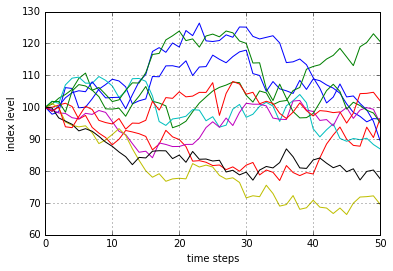

In [5]:
plt.plot(paths[:, :10])
plt.grid(True)
plt.xlabel('time steps')
plt.ylabel('index level')
# tag: normal_sim_1
# title: 10 simulated paths of geometric Brownian motion

In [6]:
log_returns = np.log(paths[1:] / paths[0:-1]) 

In [7]:
paths[:, 0].round(4)

array([ 100.    ,   97.821 ,   98.5573,  106.1546,  105.899 ,   99.8363,
        100.0145,  102.6589,  105.6643,  107.1107,  108.7943,  108.2449,
        106.4105,  101.0575,  102.0197,  102.6052,  109.6419,  109.5725,
        112.9766,  113.0225,  112.5476,  114.5585,  109.942 ,  112.6271,
        112.7502,  116.3453,  115.0443,  113.9586,  115.8831,  117.3705,
        117.9185,  110.5539,  109.9687,  104.9957,  108.0679,  105.7822,
        105.1585,  104.3304,  108.4387,  105.5963,  108.866 ,  108.3284,
        107.0077,  106.0034,  104.3964,  101.0637,   98.3776,   97.135 ,
         95.4254,   96.4271,   96.3386])

In [8]:
log_returns[:, 0].round(4)

array([-0.022 ,  0.0075,  0.0743, -0.0024, -0.059 ,  0.0018,  0.0261,
        0.0289,  0.0136,  0.0156, -0.0051, -0.0171, -0.0516,  0.0095,
        0.0057,  0.0663, -0.0006,  0.0306,  0.0004, -0.0042,  0.0177,
       -0.0411,  0.0241,  0.0011,  0.0314, -0.0112, -0.0095,  0.0167,
        0.0128,  0.0047, -0.0645, -0.0053, -0.0463,  0.0288, -0.0214,
       -0.0059, -0.0079,  0.0386, -0.0266,  0.0305, -0.0049, -0.0123,
       -0.0094, -0.0153, -0.0324, -0.0269, -0.0127, -0.0178,  0.0104,
       -0.0009])

In [9]:
def print_statistics(array):
    ''' Prints selected statistics.
    
    Parameters
    ==========
    array: ndarray
        object to generate statistics on
    '''
    sta = scs.describe(array)
    print "%14s %15s" % ('statistic', 'value')
    print 30 * "-"
    print "%14s %15.5f" % ('size', sta[0])
    print "%14s %15.5f" % ('min', sta[1][0])
    print "%14s %15.5f" % ('max', sta[1][1])
    print "%14s %15.5f" % ('mean', sta[2])
    print "%14s %15.5f" % ('std', np.sqrt(sta[3]))
    print "%14s %15.5f" % ('skew', sta[4])
    print "%14s %15.5f" % ('kurtosis', sta[5])

In [10]:
print_statistics(log_returns.flatten())

     statistic           value
------------------------------
          size  12500000.00000
           min        -0.15664
           max         0.15371
          mean         0.00060
           std         0.02828
          skew         0.00055
      kurtosis         0.00085


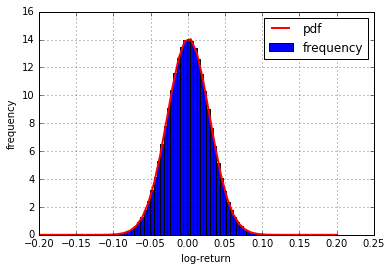

In [11]:
plt.hist(log_returns.flatten(), bins=70, normed=True, label='frequency')
plt.grid(True)
plt.xlabel('log-return')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, loc=r / M, scale=sigma / np.sqrt(M)),
         'r', lw=2.0, label='pdf')
plt.legend()
# tag: normal_sim_2
# title: Histogram of log-returns and normal density function

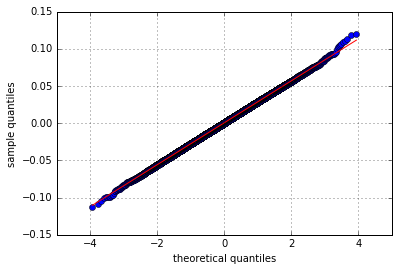

In [12]:
sm.qqplot(log_returns.flatten()[::500], line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')
# tag: sim_val_qq_1
# title: Quantile-quantile plot for log returns

In [13]:
def normality_tests(arr):
    ''' Tests for normality distribution of given data set.
    
    Parameters
    ==========
    array: ndarray
        object to generate statistics on
    '''
    print "Skew of data set  %14.3f" % scs.skew(arr)
    print "Skew test p-value %14.3f" % scs.skewtest(arr)[1]
    print "Kurt of data set  %14.3f" % scs.kurtosis(arr)
    print "Kurt test p-value %14.3f" % scs.kurtosistest(arr)[1]
    print "Norm test p-value %14.3f" % scs.normaltest(arr)[1]

In [14]:
normality_tests(log_returns.flatten())

Skew of data set           0.001
Skew test p-value          0.430
Kurt of data set           0.001
Kurt test p-value          0.541
Norm test p-value          0.607


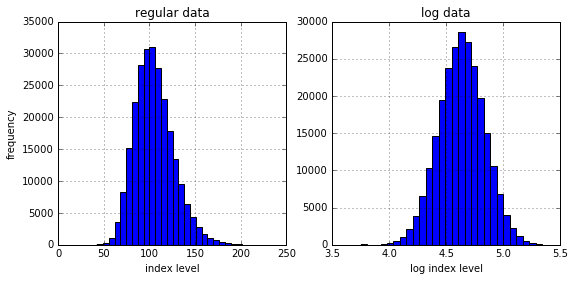

In [15]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
ax1.hist(paths[-1], bins=30)
ax1.grid(True)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax1.set_title('regular data')
ax2.hist(np.log(paths[-1]), bins=30)
ax2.grid(True)
ax2.set_xlabel('log index level')
ax2.set_title('log data')
# tag: normal_sim_3
# title: Histogram of simulated end-of-period index levels
# size: 90

In [16]:
print_statistics(paths[-1])

     statistic           value
------------------------------
          size    250000.00000
           min        42.74870
           max       233.58435
          mean       105.12645
           std        21.23174
          skew         0.61116
      kurtosis         0.65182


In [17]:
print_statistics(np.log(paths[-1]))

     statistic           value
------------------------------
          size    250000.00000
           min         3.75534
           max         5.45354
          mean         4.63517
           std         0.19998
          skew        -0.00092
      kurtosis        -0.00327


In [18]:
normality_tests(np.log(paths[-1]))

Skew of data set          -0.001
Skew test p-value          0.851
Kurt of data set          -0.003
Kurt test p-value          0.744
Norm test p-value          0.931


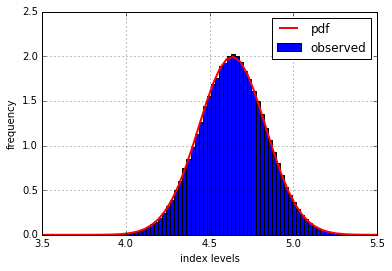

In [19]:
log_data = np.log(paths[-1])
plt.hist(log_data, bins=70, normed=True, label='observed')
plt.grid(True)
plt.xlabel('index levels')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, log_data.mean(), log_data.std()),
         'r', lw=2.0, label='pdf')
plt.legend()
# tag: normal_sim_4
# title: Histogram of log index levels and normal density function

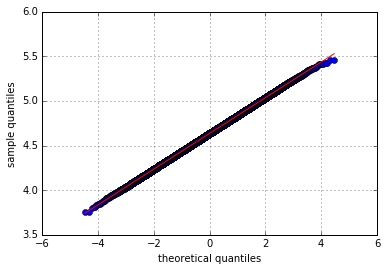

In [20]:
sm.qqplot(log_data, line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')
# tag: sim_val_qq_2
# title: Quantile-quantile plot for log index levels

### Real World Data

In [21]:
import pandas as pd
import pandas.io.data as web
import numpy  
import matplotlib.pyplot as plt
%matplotlib inline

d:\Anaconda2\lib\site-packages\pandas\io\data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [22]:
#data = pd.DataFrame()
#for sym in symbols:
    #data[sym] = web.DataReader(sym, data_source='yahoo',start='1/1/2006')['Adj Close']


In [23]:
#symbols = ['^GDAXI', '^GSPC', 'YHOO', 'MSFT']
symbols = ['^GDAXI', '^GSPC', 'AMZN', 'MSFT']
dates = pd.date_range('20160101',periods=252)
dates

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2016-08-30', '2016-08-31', '2016-09-01', '2016-09-02',
               '2016-09-03', '2016-09-04', '2016-09-05', '2016-09-06',
               '2016-09-07', '2016-09-08'],
              dtype='datetime64[ns]', length=252, freq='D')

In [24]:
adjC = pd.read_csv('data/adjClose.csv',header=None)
my_matrix = adjC.as_matrix(columns=None)
my_matrix

array([[ 12953.41,   2557.15,    972.91,     78.63],
       [ 13013.19,   2569.13,    975.9 ,     78.86],
       [ 13003.14,   2564.98,    966.3 ,     78.83],
       ..., 
       [ 11181.42,   2126.41,    776.32,     58.46],
       [ 11180.42,   2133.04,    818.36,     58.69],
       [ 11179.42,   2139.43,    822.59,     59.2 ]])

In [25]:
data = pd.DataFrame(my_matrix,index=dates,columns=['^GDAXI', '^GSPC', 'AMZN', 'MSFT'])

In [26]:
#data[:5]
data.tail()
#data

,^GDAXI,^GSPC,AMZN,MSFT
2016-09-04,11183.42,2111.72,785.41,58.39
2016-09-05,11182.42,2126.15,789.82,58.51
2016-09-06,11181.42,2126.41,776.32,58.46
2016-09-07,11180.42,2133.04,818.36,58.69
2016-09-08,11179.42,2139.43,822.59,59.20


In [27]:
#data = data.dropna()

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-01 to 2016-09-08
Freq: D
Data columns (total 4 columns):
^GDAXI    252 non-null float64
^GSPC     252 non-null float64
AMZN      252 non-null float64
MSFT      252 non-null float64
dtypes: float64(4)
memory usage: 9.8 KB


In [29]:
data.head()

,^GDAXI,^GSPC,AMZN,MSFT
2016-01-01,12953.41,2557.15,972.91,78.63
2016-01-02,13013.19,2569.13,975.90,78.86
2016-01-03,13003.14,2564.98,966.30,78.83
2016-01-04,12991.28,2575.21,982.91,78.81
2016-01-05,12990.10,2562.10,986.61,77.91


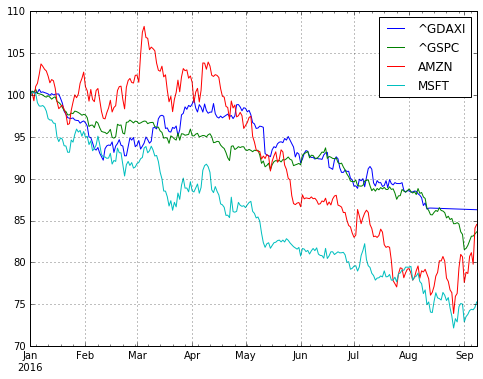

In [30]:
(data / data.ix[0] * 100).plot(figsize=(8, 6), grid=True)
# tag: real_returns_1
# title: Evolution of stock and index levels over time

In [31]:
log_returns = np.log(data / data.shift(1))
log_returns.head()

,^GDAXI,^GSPC,AMZN,MSFT
2016-01-01,NaN,NaN,NaN,NaN
2016-01-02,0.004604,0.004674,0.003069,0.002921
2016-01-03,-0.000773,-0.001617,-0.009886,-0.000380
2016-01-04,-0.000913,0.003980,0.017043,-0.000254
2016-01-05,-0.000091,-0.005104,0.003757,-0.011486


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E1A6DA0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000F715978>]], dtype=object)

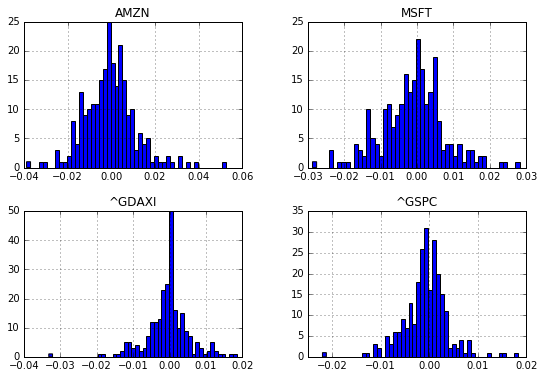

In [32]:
log_returns.hist(bins=50, figsize=(9, 6))
# tag: real_returns_2
# title: Histogram of respective log-returns
# size: 90

In [33]:
for sym in symbols:
    print "\nResults for symbol %s" % sym
    print 30 * "-"
    log_data = np.array(log_returns[sym].dropna())
    print_statistics(log_data)


Results for symbol ^GDAXI
------------------------------
     statistic           value
------------------------------
          size       251.00000
           min        -0.03317
           max         0.01844
          mean        -0.00059
           std         0.00603
          skew        -0.57608
      kurtosis         3.93516

Results for symbol ^GSPC
------------------------------
     statistic           value
------------------------------
          size       251.00000
           min        -0.02198
           max         0.01835
          mean        -0.00071
           std         0.00458
          skew         0.00110
      kurtosis         3.47453

Results for symbol AMZN
------------------------------
     statistic           value
------------------------------
          size       251.00000
           min        -0.03881
           max         0.05274
          mean        -0.00067
           std         0.01197
          skew         0.52475
      kurtosis         

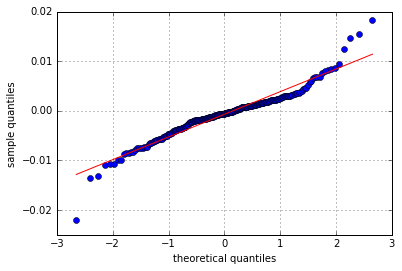

In [34]:
sm.qqplot(log_returns['^GSPC'].dropna(), line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')
# tag: real_val_qq_1
# title: Quantile-quantile plot for S&P 500 log returns

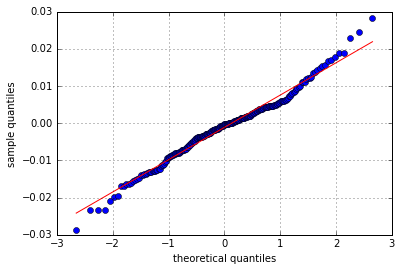

In [35]:
sm.qqplot(log_returns['MSFT'].dropna(), line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')
# tag: real_val_qq_2
# title: Quantile-quantile plot for Microsoft log returns

In [36]:
for sym in symbols:
    print "\nResults for symbol %s" % sym
    print 32 * "-"
    log_data = np.array(log_returns[sym].dropna())
    normality_tests(log_data)


Results for symbol ^GDAXI
--------------------------------
Skew of data set          -0.576
Skew test p-value          0.000
Kurt of data set           3.935
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol ^GSPC
--------------------------------
Skew of data set           0.001
Skew test p-value          0.994
Kurt of data set           3.475
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol AMZN
--------------------------------
Skew of data set           0.525
Skew test p-value          0.001
Kurt of data set           2.125
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol MSFT
--------------------------------
Skew of data set           0.020
Skew test p-value          0.892
Kurt of data set           0.839
Kurt test p-value          0.023
Norm test p-value          0.074


## Portfolio Optimization

### The Data

In [37]:
import numpy as np
import pandas as pd
import pandas.io.data as web
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
#symbols = ['AAPL', 'MSFT', 'YHOO', 'DB', 'GLD']
symbols = ['^GDAXI', '^GSPC', 'AMZN', 'MSFT']
noa = len(symbols)

In [39]:
#data = pd.DataFrame()
#for sym in symbols:
#    data[sym] = web.DataReader(sym, data_source='yahoo', end='2014-09-12')['Adj Close']

In [40]:
#data.columns = symbols

In [41]:
dates = pd.date_range('20160101',periods=252)
dates

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2016-08-30', '2016-08-31', '2016-09-01', '2016-09-02',
               '2016-09-03', '2016-09-04', '2016-09-05', '2016-09-06',
               '2016-09-07', '2016-09-08'],
              dtype='datetime64[ns]', length=252, freq='D')

In [42]:
adjC = pd.read_csv('data/adjClose.csv',header=None)
my_matrix = adjC.as_matrix(columns=None)
my_matrix

array([[ 12953.41,   2557.15,    972.91,     78.63],
       [ 13013.19,   2569.13,    975.9 ,     78.86],
       [ 13003.14,   2564.98,    966.3 ,     78.83],
       ..., 
       [ 11181.42,   2126.41,    776.32,     58.46],
       [ 11180.42,   2133.04,    818.36,     58.69],
       [ 11179.42,   2139.43,    822.59,     59.2 ]])

In [43]:
data = pd.DataFrame(my_matrix,index=dates,columns=['^GDAXI', '^GSPC', 'AMZN', 'MSFT'])
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-01 to 2016-09-08
Freq: D
Data columns (total 4 columns):
^GDAXI    252 non-null float64
^GSPC     252 non-null float64
AMZN      252 non-null float64
MSFT      252 non-null float64
dtypes: float64(4)
memory usage: 9.8 KB


In [44]:
data.head()

,^GDAXI,^GSPC,AMZN,MSFT
2016-01-01,12953.41,2557.15,972.91,78.63
2016-01-02,13013.19,2569.13,975.90,78.86
2016-01-03,13003.14,2564.98,966.30,78.83
2016-01-04,12991.28,2575.21,982.91,78.81
2016-01-05,12990.10,2562.10,986.61,77.91


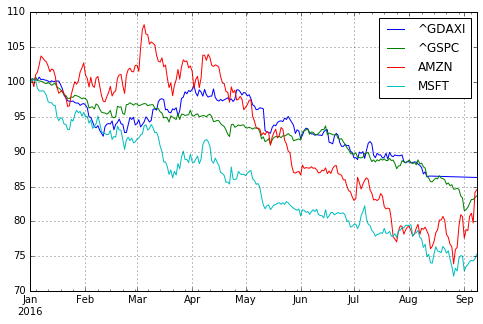

In [45]:
(data / data.ix[0] * 100).plot(figsize=(8, 5), grid=True)
# tag: portfolio_1
# title: Stock prices over time
# size: 90

In [46]:
rets = np.log(data / data.shift(1))

In [47]:
rets.mean() * 252

^GDAXI   -0.147871
^GSPC    -0.179064
AMZN     -0.168502
MSFT     -0.284963
dtype: float64

In [48]:
rets.cov() * 252

,^GDAXI,^GSPC,AMZN,MSFT
^GDAXI,0.009160,0.000826,0.000262,0.000547
^GSPC,0.000826,0.005278,0.006640,0.006235
AMZN,0.000262,0.006640,0.036135,0.015060
MSFT,0.000547,0.006235,0.015060,0.019057


### The Basic Theory

In [49]:
weights = np.random.random(noa)
weights /= np.sum(weights)

In [50]:
weights

array([ 0.07650728,  0.06021919,  0.63364218,  0.22963135])

In [51]:
np.sum(rets.mean() * weights) * 252
  # expected portfolio return

-0.19430287732317317

In [52]:
np.dot(weights.T, np.dot(rets.cov() * 252, weights))
  # expected portfolio variance

0.020699967019128948

In [53]:
np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
  # expected portfolio standard deviation/volatility

0.1438748310828859

In [54]:
prets = []
pvols = []
for p in range (2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(np.sum(rets.mean() * weights) * 252)
    pvols.append(np.sqrt(np.dot(weights.T, 
                        np.dot(rets.cov() * 252, weights))))
prets = np.array(prets)
pvols = np.array(pvols)

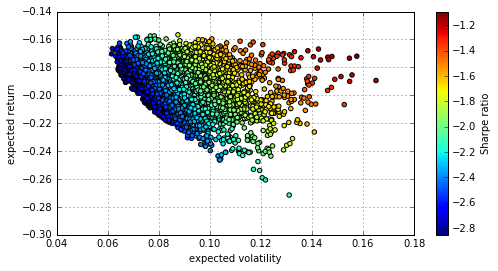

In [55]:
plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets, c=prets / pvols, marker='o')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
# tag: portfolio_2
# title: Expected return and volatility for different/random portfolio weights
# size: 90

### Portfolio Optimizations

In [56]:
def statistics(weights):
    ''' Return portfolio statistics.
    
    Parameters
    ==========
    weights : array-like
        weights for different securities in portfolio
    
    Returns
    =======
    pret : float
        expected portfolio return
    pvol : float
        expected portfolio volatility
    pret / pvol : float
        Sharpe ratio for rf=0
    '''
    weights = np.array(weights)
    pret = np.sum(rets.mean() * weights) * 252
    pvol = np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
    return np.array([pret, pvol, pret / pvol])

In [57]:
import scipy.optimize as sco

In [58]:
def min_func_sharpe(weights):
    return -statistics(weights)[2]

In [59]:
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

In [60]:
bnds = tuple((0, 1) for x in range(noa))

In [61]:
noa * [1. / noa,]

[0.25, 0.25, 0.25, 0.25]

In [62]:
%%time
opts = sco.minimize(min_func_sharpe, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)

Wall time: 9 ms


In [63]:
opts

     fun: 0.8864278904199933
     jac: array([ 0.7714664 ,  0.77910151,  0.        ,  1.12963059])
 message: 'Optimization terminated successfully.'
    nfev: 12
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
         1.38777878e-16])

In [64]:
opts['x'].round(3)

array([ 0.,  0.,  1.,  0.])

In [65]:
statistics(opts['x']).round(3)

array([-0.169,  0.19 , -0.886])

In [66]:
def min_func_variance(weights):
    return statistics(weights)[1] ** 2

In [67]:
optv = sco.minimize(min_func_variance, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)

In [68]:
optv

     fun: 0.0037282352479983847
     jac: array([ 0.00735481,  0.00750935,  0.0089154 ,  0.00857732])
 message: 'Optimization terminated successfully.'
    nfev: 84
     nit: 14
    njev: 14
  status: 0
 success: True
       x: array([  3.42177443e-01,   6.57822557e-01,   1.73472348e-18,
         9.70360944e-18])

In [69]:
optv['x'].round(3)

array([ 0.342,  0.658,  0.   ,  0.   ])

In [70]:
statistics(optv['x']).round(3)

array([-0.168,  0.061, -2.758])

### Efficient Frontier

In [71]:
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple((0, 1) for x in weights)

In [72]:
def min_func_port(weights):
    return statistics(weights)[1]

In [73]:
%%time
trets = np.linspace(0.0, 0.25, 50)
tvols = []
for tret in trets:
    cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
            {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
    res = sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

Wall time: 51.5 s


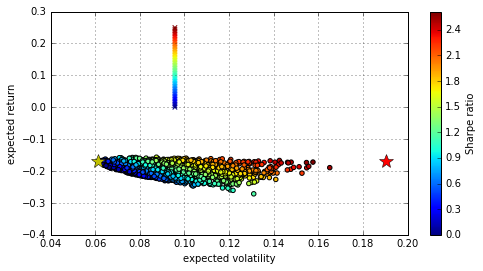

In [74]:
plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets,
            c=prets / pvols, marker='o')
            # random portfolio composition
plt.scatter(tvols, trets,
            c=trets / tvols, marker='x')
            # efficient frontier
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0],
         'r*', markersize=15.0)
            # portfolio with highest Sharpe ratio
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0],
         'y*', markersize=15.0)
            # minimum variance portfolio
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
# tag: portfolio_3
# title: Minimum risk portfolios for given return level (crosses)
# size: 90

### Capital Market Line

In [75]:
import scipy.interpolate as sci
from scipy import interpolate

In [76]:
ind = np.argmin(tvols)

In [77]:
evols = tvols[ind:]

In [78]:
erets = trets[ind:]

In [79]:
x = np.arange(0,2*np.pi+np.pi/4,2*np.pi/8)
y = np.sin(x)
tck = interpolate.splrep(x,y,s=0)

#tck = sci.splrep(evols, erets)

In [80]:
def f(x):
    ''' Efficient frontier function (splines approximation). '''
    return sci.splev(x, tck, der=0)
def df(x):
    ''' First derivative of efficient frontier function. '''
    return sci.splev(x, tck, der=1)

In [81]:
def equations(p, rf=0.01):
    eq1 = rf - p[0]
    eq2 = rf + p[1] * p[2] - f(p[2])
    eq3 = p[1] - df(p[2])
    return eq1, eq2, eq3

In [82]:
opt = sco.fsolve(equations, [0.01, 0.5, 0.15])

In [83]:
opt

array([ 0.01      ,  0.98011933,  0.23829877])

In [84]:
np.round(equations(opt), 6)

array([ 0.,  0.,  0.])

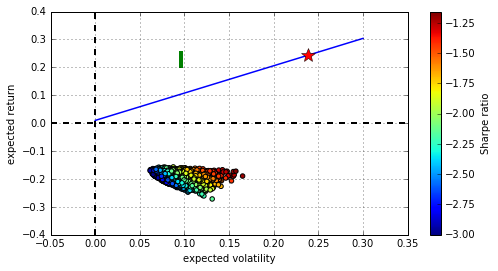

In [85]:
plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets,
            c=(prets - 0.01) / pvols, marker='o')
            # random portfolio composition
plt.plot(evols, erets, 'g', lw=4.0)
            # efficient frontier
cx = np.linspace(0.0, 0.3)
plt.plot(cx, opt[0] + opt[1] * cx, lw=1.5)
            # capital market line
plt.plot(opt[2], f(opt[2]), 'r*', markersize=15.0) 
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
# tag: portfolio_4
# title: Capital market line and tangency portfolio (star) for risk-free rate of 1%
# size: 90

In [86]:
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - f(opt[2])},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
res = sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)

In [87]:
res['x'].round(3)

array([ 1.,  0.,  0.,  0.])